In [5]:
# IMPORT LIBRARIES

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn
from IPython.display import Image 
import pandas as pd
import numpy as np

In [6]:
# IMPORT DATA

data = pd.read_csv('https://raw.githubusercontent.com/rajatg64/Iris-Flowers-Classification-ML-Project/master/iris.data.csv', header = None)
data = data.rename(columns = {0:'Sepal_len', 1:'Sepal_wid', 2:'Petal_len', 3:'Petal_wid', 4:'Species'})
data.head()

,Sepal_len,Sepal_wid,Petal_len,Petal_wid,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# SPLIT DATA INTO X & Y

X = data.iloc[:,0:4]

y = data['Species']

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:
# CREATE DUMMY VARIABLES --> 1 = TRUE

y_dum = pd.get_dummies(y)



In [9]:
# IMPORT TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

In [10]:
# SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=10)

print(X_train.shape,y_train.shape)

(120, 4) (120,)


In [61]:
# IMPORT DECISION TREE MODEL

D_Tree = DecisionTreeClassifier(max_depth=5)

In [62]:
# FIT MODEL

Model = D_Tree.fit(X_train, y_train)


In [63]:
# PREDICT W/ TEST DATA

pred = Model.predict(X_test)

In [64]:
# SEE ACCURACY -- DIAGONAL IN ARRAY SIGNALS CORRECT PREDICTIONS


pd.DataFrame(confusion_matrix(y_test, pred))

,0,1,2
0,10,0,0
1,0,12,1
2,0,0,7


[Text(106.52727272727273, 201.90857142857143, '[4.6 3.1 1.5 0.2] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]\nclass = Iris-setosa'),
 Text(76.0909090909091, 170.84571428571428, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(136.96363636363637, 170.84571428571428, '[4.7 3.2 1.3 0.2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]\nclass = Iris-setosa'),
 Text(60.872727272727275, 139.78285714285715, '[4.6 3.1 1.5 0.2] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Iris-setosa'),
 Text(30.436363636363637, 108.72, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-setosa'),
 Text(91.30909090909091, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(213.05454545454546, 139.78285714285715, '[4.6 3.1 1.5 0.2] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = Iris-setosa'),
 Text(152.1818181818182, 108.72, '[4.7 3.2 1.3 0.2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0,

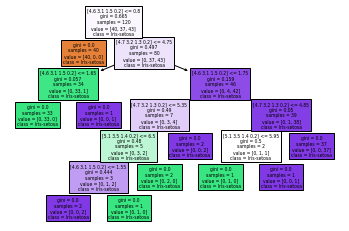

In [38]:
# VISUALIZE TREE

tree.plot_tree(Model, 
                   feature_names=pd.DataFrame.to_numpy(X),  
                   class_names=pd.DataFrame.to_numpy(y),
                   filled=True)

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=2, 
                               bootstrap = True,
                               max_features = 'sqrt', # max number of splits from each node
                                )

In [93]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=2)

In [85]:
RF_pred = RF_model.predict(X_test)

In [86]:
pd.DataFrame(confusion_matrix(y_test,RF_pred))

,0,1,2
0,10,0,0
1,0,13,0
2,0,0,7


In [87]:
from sklearn import metrics


print(metrics.accuracy_score(y_test,RF_pred)*100,"%")

100.0 %


In [112]:
# GRADIENT BOOST LIBS

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [116]:
# CREATE GB MODEL

GB_model = GradientBoostingClassifier(max_depth=3,
                                learning_rate= 2,
                                n_estimators=5 )



In [117]:
# LOOK AT PARAMS

'''Criterion: The loss function used to find the optimal feature and threshold to split the data
learning_rate: this parameter scales the contribution of each tree
max_depth: the maximum depth of each tree
n_estimators: the number of trees to construct
init: the initial estimator. By default, it is the log(odds) converted to a probability(like we discussed before)'''



print(GB_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 2, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [118]:
# FIT MODEL


GB_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=2, n_estimators=5)

In [120]:
GB_pred = GB_model.predict(X_test)

In [119]:


print(classification_report(y_test,GB_model.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [122]:
# ACCURACY CHECK 

print(metrics.accuracy_score(y_test,GB_pred)*100,"%")

print(confusion_matrix(y_test, GB_pred))

96.66666666666667 %
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
